<a href="https://colab.research.google.com/github/thanhvietnguyen/Titanic-ML-project/blob/master/notebooks/eda_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Cấu hình hiển thị
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [4]:
#Đọc dữ liệu
df = pd.read_csv("https://raw.githubusercontent.com/thanhvietnguyen/Titanic-ML-project/refs/heads/master/data/train.csv")

In [5]:
#Tổng quan dữ liệu
print("Kích thước:", df.shape)
display(df.head())

Kích thước: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [7]:
display(df.describe(include='all'))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
#Tỉ lệ sống sót
survival_rate = df['Survived'].value_counts(normalize=True)
print("Tỷ lệ sống sót:\n", survival_rate)

Tỷ lệ sống sót:
 Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


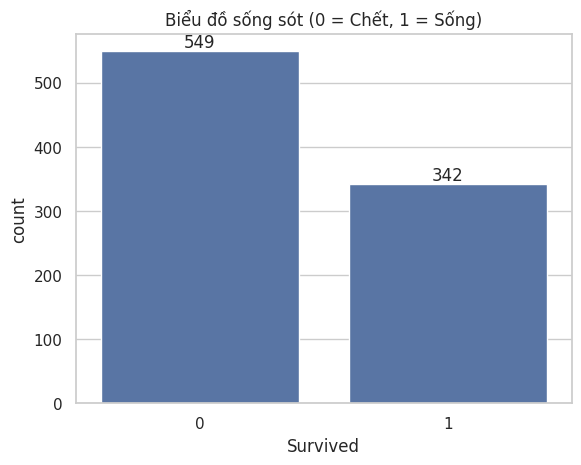

In [9]:
ax = sns.countplot(x='Survived', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom',
                xytext=(0, 0),
                textcoords='offset points')
plt.title("Biểu đồ sống sót (0 = Chết, 1 = Sống)")
plt.show()

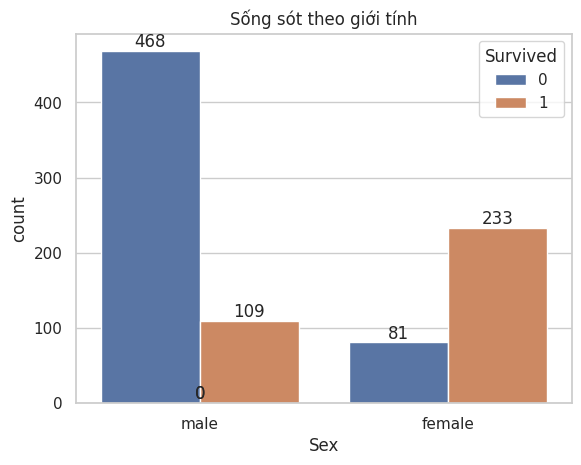

In [10]:
#Giới tính
ax = sns.countplot(x='Sex', hue='Survived', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom',
                xytext=(0, 0),
                textcoords='offset points')
plt.title("Sống sót theo giới tính")
plt.show()

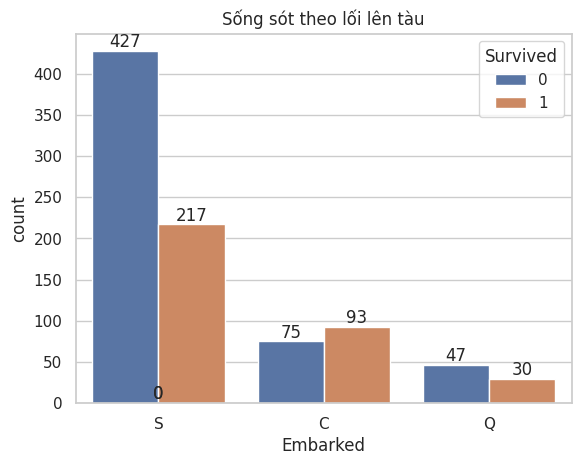

In [11]:
#Lối lên tàu
ax = sns.countplot(x='Embarked', hue='Survived', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom',
                xytext=(0, 0),
                textcoords='offset points')
plt.title("Sống sót theo lối lên tàu")
plt.show()

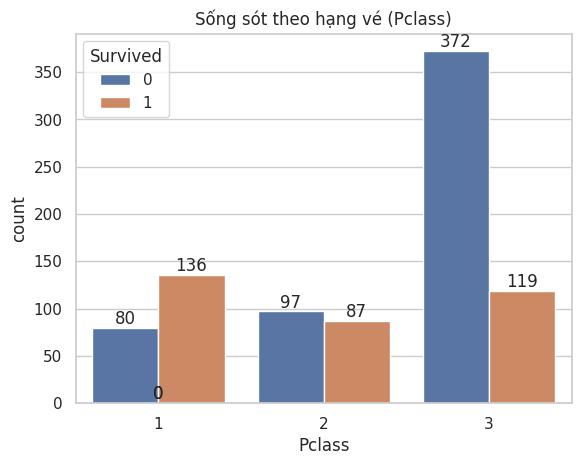

In [ ]:
#Hạng vé
ax = sns.countplot(x='Pclass', hue='Survived', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom',
                xytext=(0, 0),
                textcoords='offset points')
plt.title("Sống sót theo hạng vé (Pclass)")
plt.show()

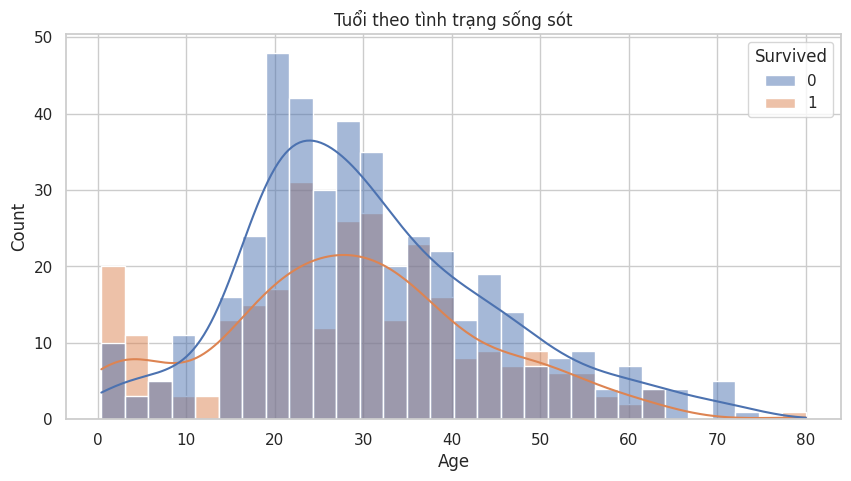

In [ ]:
#Tuổi
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Age", hue="Survived", bins=30, kde=True)
plt.title("Tuổi theo tình trạng sống sót")
plt.show()

In [ ]:
#Kiểm tra Missing Values
missing = df.isnull().sum()
print("Missing values:\n", missing)

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


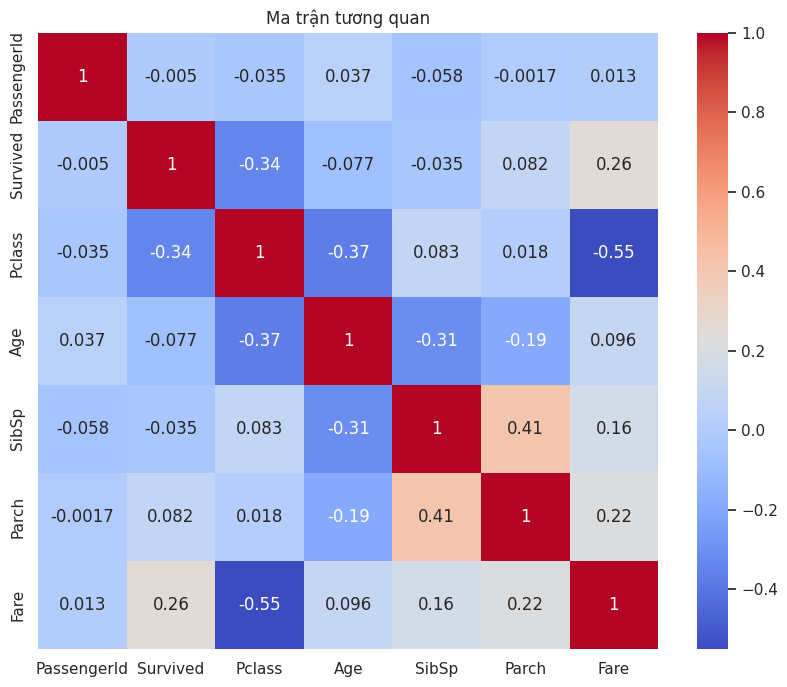

In [ ]:
#Mối tương quan giữa các biến số numeric
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Ma trận tương quan")
plt.show()

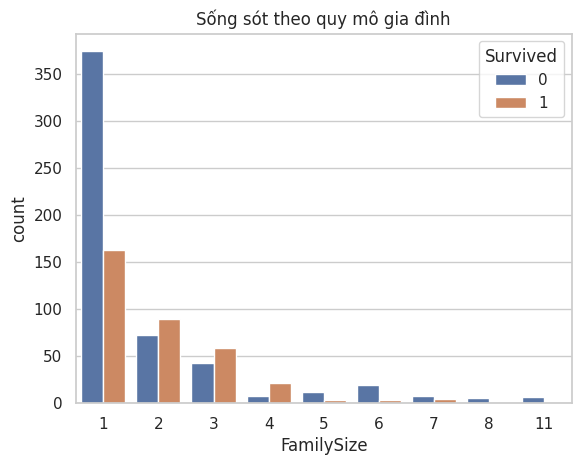

In [ ]:
#Tạo biến mới (Feature Engineering cơ bản)
#Quy mô gia đình = Số người thân đi cùng (ace/vc + cha mẹ/con) + Bản thân
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Sống sót theo quy mô gia đình")
plt.show()

Tỷ lệ có Cabin: 0.22895622895622897


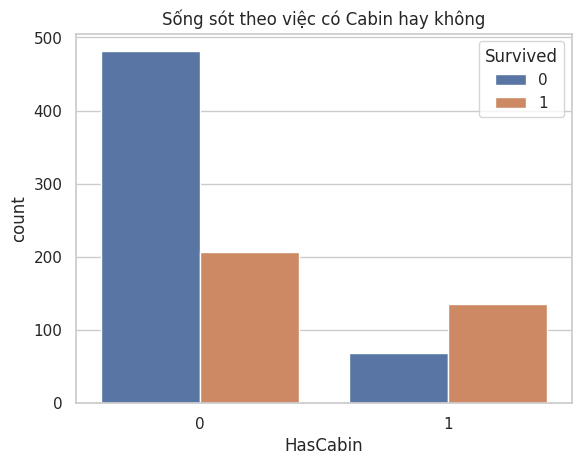

In [ ]:
#Phân tích cột Cabin
print("Tỷ lệ có Cabin:", df['Cabin'].notnull().mean())
df['HasCabin'] = df['Cabin'].notnull().astype(int)
sns.countplot(x='HasCabin', hue='Survived', data=df)
plt.title("Sống sót theo việc có Cabin hay không")
plt.show()